In [1]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

file="all"
traindir="datasets/binary_train"
testdir="datasets/binary_test"


Using TensorFlow backend.


In [2]:
# load the dataset
traindata = pd.read_csv(f"{traindir}/processed/{file}.csv")
testdata = pd.read_csv(f"{testdir}/processed/{file}.csv")
n=len(traindata.count())
n

44

In [3]:
# split into input (X) and output (y) variables
X = traindata.iloc[:,0:n-1]
y = traindata.iloc[:,n-1]
X_test = testdata.iloc[:,0:n-1]
y_test = testdata.iloc[:,n-1]

In [4]:
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=n-1, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:

# compile the keras model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:

# fit the keras model on the dataset
history = model.fit(X, y, epochs=100, batch_size=5000,validation_split=0.2)


Train on 100778 samples, validate on 25195 samples
Epoch 1/100
100778/100778 [==============================] - 1s 7us/step - loss: 0.5934 - accuracy: 0.7186 - val_loss: 0.4820 - val_accuracy: 0.8886
Epoch 2/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.4013 - accuracy: 0.9013 - val_loss: 0.3126 - val_accuracy: 0.9514
Epoch 3/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.2411 - accuracy: 0.9566 - val_loss: 0.1706 - val_accuracy: 0.9602
Epoch 4/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.1407 - accuracy: 0.9642 - val_loss: 0.1148 - val_accuracy: 0.9693
Epoch 5/100
100778/100778 [==============================] - 0s 5us/step - loss: 0.1041 - accuracy: 0.9699 - val_loss: 0.0927 - val_accuracy: 0.9717
Epoch 6/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.0872 - accuracy: 0.9721 - val_loss: 0.0799 - val_accuracy: 0.9753
Epoch 7/100
100778/100778 [============================

100778/100778 [==============================] - 0s 3us/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.0184 - val_accuracy: 0.9940
Epoch 56/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.0173 - val_accuracy: 0.9945
Epoch 57/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0172 - val_accuracy: 0.9943
Epoch 58/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0172 - val_accuracy: 0.9948
Epoch 59/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0177 - val_accuracy: 0.9948
Epoch 60/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0172 - val_accuracy: 0.9944
Epoch 61/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.0145 - accuracy: 0.9955 - val

In [8]:

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

22542/22542 [==============================] - 0s 14us/step
Accuracy: 78.47


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
prediction=model.predict_classes(X_test)
m=confusion_matrix(y_test,prediction)
m

array([[9443,  267],
       [4587, 8245]], dtype=int64)

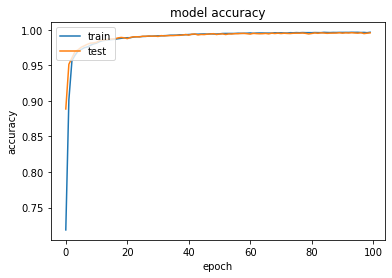

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:

# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]
print(rounded[1] )

0.0
